<a href="https://colab.research.google.com/github/Shubham-thap/FertilizerRecomendation/blob/main/RESNET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="s4FZabiIIE2JRuSa8MFn")
project = rf.workspace("krishi-oz05i").project("agrifarm-3zwm0")
version = project.version(13)
dataset = version.download("png-mask-semantic")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 91.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to AGRIFARM-13 in png-mask-semantic:: 100%|██████████| 1532/1532 [00:00<00:00, 2922.41it/s]


In [ ]:
import os
import shutil

# Original folder containing mixed files
src_dir = "/content/AGRIFARM-13/train"

# Destination folders
img_dest = "/content/AGRIFARM-13/train/images"
mask_dest = "/content/AGRIFARM-13/train/masks"

# Create destination folders if they don't exist
os.makedirs(img_dest, exist_ok=True)
os.makedirs(mask_dest, exist_ok=True)

# Move files
for f in os.listdir(src_dir):
    src_path = os.path.join(src_dir, f)
    if f.endswith(".jpg"):
        shutil.copy(src_path, os.path.join(img_dest, f))
    elif f.endswith("_mask.png"):
        shutil.copy(src_path, os.path.join(mask_dest, f))

print(f"✅ All images moved to {img_dest}")
print(f"✅ All masks moved to {mask_dest}")


✅ All images moved to /content/AGRIFARM-13/train/images
✅ All masks moved to /content/AGRIFARM-13/train/masks


In [ ]:
import os
import shutil

# Original folder containing mixed files
src_dir = "/content/AGRIFARM-13/train"

# Destination folders
img_dest = "/content/AGRIFARM-13/valid/images"
mask_dest = "/content/AGRIFARM-13/valid/masks"

# Create destination folders if they don't exist
os.makedirs(img_dest, exist_ok=True)
os.makedirs(mask_dest, exist_ok=True)

# Move files
for f in os.listdir(src_dir):
    src_path = os.path.join(src_dir, f)
    if f.endswith(".jpg"):
        shutil.copy(src_path, os.path.join(img_dest, f))
    elif f.endswith("_mask.png"):
        shutil.copy(src_path, os.path.join(mask_dest, f))

print(f"✅ All images moved to {img_dest}")
print(f"✅ All masks moved to {mask_dest}")


✅ All images moved to /content/AGRIFARM-13/valid/images
✅ All masks moved to /content/AGRIFARM-13/valid/masks


In [ ]:
import os
import shutil

# Original folder containing mixed files
src_dir = "/content/AGRIFARM-13/test"

# Destination folders
img_dest = "/content/AGRIFARM-13/test/images"
mask_dest = "/content/AGRIFARM-13/test/masks"

# Create destination folders if they don't exist
os.makedirs(img_dest, exist_ok=True)
os.makedirs(mask_dest, exist_ok=True)

# Move files
for f in os.listdir(src_dir):
    src_path = os.path.join(src_dir, f)
    if f.endswith(".jpg"):
        shutil.copy(src_path, os.path.join(img_dest, f))
    elif f.endswith("_mask.png"):
        shutil.copy(src_path, os.path.join(mask_dest, f))

print(f"✅ All images moved to {img_dest}")
print(f"✅ All masks moved to {mask_dest}")


✅ All images moved to /content/AGRIFARM-13/test/images
✅ All masks moved to /content/AGRIFARM-13/test/masks


In [ ]:
!pip install segmentation-models-pytorch==0.3.1 timm==0.4.12


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.1/102.1 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.0/377.0 kB 22.3 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16426 sha256=14fbbfa06447c6391f68583a3aedf4c5948a8f06d08a58e02858dc33e06a821f
  Stored in directory: /root/.cache/pip/wheels/9c/3f/43/e6271c7026fe08c185da2be23c98c8e87477d3db63f41f32ad
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60945 sha256=0fdc0c9a86d1985a788c05a82da6a11a81cab0fac57d5d4e07b059e3103a1aca
  Stored in directory: /root/.cache/pip/wheels/4c/01/56/40a48f75dbdfe167a0cb70d3b48913369a00ec5c4e9fed5f2b
Successfully built efficientnet-pytorch pretrainedmodels
  Attempting uninstall: timm
    Found existing installat

In [ ]:
# Full working ResNet-34 UNet training script
# Requirements: segmentation-models-pytorch, timm, albumentations, torch, torchvision, pillow

import os
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torch.optim import Adam
from torch.optim.lr_scheduler import ReduceLROnPlateau
from tqdm import tqdm
import albumentations as A
from albumentations.pytorch import ToTensorV2
import segmentation_models_pytorch as smp

# ==========================================
# 1. CONFIG
# ==========================================
CONFIG = {
    "ROOT_DIR": "/content/AGRIFARM-13",   # <<-- set to your dataset root
    "IMG_SIZE": 512,
    "BATCH_SIZE": 8,                      # lower if OOM (4 or 2)
    "LR": 1e-4,
    "EPOCHS": 20,
    "PATIENCE": 5,
    # 4 classes: 0=Background, 1=Veg(merged), 2=Farm, 3=Sand
    "NUM_CLASSES_TO_TRAIN": 4,
    "IGNORE_INDEX": 255,
    "DEVICE": "cuda" if torch.cuda.is_available() else "cpu",
    "MODEL_SAVE_PATH": "resnet34_unet_best_4classes.pth",
    # suggested workers (Colab often recommends 2)
    "NUM_WORKERS": 2
}

# ==========================================
# 2. LOSSES
# ==========================================
class DiceLoss(nn.Module):
    def __init__(self, ignore_index=255, smooth=1.0):
        super().__init__()
        self.ignore_index = ignore_index
        self.smooth = smooth

    def forward(self, inputs, targets):
        # inputs: logits (B, C, H, W)
        probs = F.softmax(inputs, dim=1)
        num_classes = inputs.shape[1]

        targets_safe = targets.clone()
        mask_ignore = (targets_safe == self.ignore_index)
        targets_safe[mask_ignore] = 0

        targets_one_hot = F.one_hot(targets_safe, num_classes=num_classes).permute(0, 3, 1, 2).float()

        valid_mask = (~mask_ignore).unsqueeze(1).float()
        probs = probs * valid_mask
        targets_one_hot = targets_one_hot * valid_mask

        probs_flat = probs.contiguous().view(-1)
        targets_flat = targets_one_hot.contiguous().view(-1)

        intersection = (probs_flat * targets_flat).sum()
        dice = (2.0 * intersection + self.smooth) / (probs_flat.sum() + targets_flat.sum() + self.smooth)
        return 1.0 - dice

class ComboLoss(nn.Module):
    def __init__(self, weight=None, ignore_index=255):
        super().__init__()
        # weight must be a tensor (moved to device by caller)
        self.ce = nn.CrossEntropyLoss(weight=weight, ignore_index=ignore_index, label_smoothing=0.1)
        self.dice = DiceLoss(ignore_index=ignore_index)

    def forward(self, inputs, targets):
        return 0.5 * self.ce(inputs, targets) + 0.5 * self.dice(inputs, targets)

# ==========================================
# 3. DATASET
# ==========================================
class FarmDataset(Dataset):
    def __init__(self, root_dir, split="train"):
        self.img_dir = os.path.join(root_dir, split, "images")
        self.mask_dir = os.path.join(root_dir, split, "masks")
        if not os.path.exists(self.img_dir):
            raise FileNotFoundError(f"Image directory not found: {self.img_dir}")
        if not os.path.exists(self.mask_dir):
            raise FileNotFoundError(f"Mask directory not found: {self.mask_dir}")

        self.images = sorted([
            f for f in os.listdir(self.img_dir)
            if f.lower().endswith((".jpg", ".jpeg", ".png"))
        ])

        if split == "train":
            self.transform = A.Compose([
                A.Resize(CONFIG["IMG_SIZE"], CONFIG["IMG_SIZE"]),
                A.HorizontalFlip(p=0.5),
                A.VerticalFlip(p=0.5),
                A.RandomRotate90(p=0.5),
                A.RandomBrightnessContrast(p=0.3),
                A.HueSaturationValue(p=0.3),
                A.GaussianBlur(p=0.1),
                A.Normalize(mean=(0.485,0.456,0.406), std=(0.229,0.224,0.225)),
                ToTensorV2()
            ])
        else:
            self.transform = A.Compose([
                A.Resize(CONFIG["IMG_SIZE"], CONFIG["IMG_SIZE"]),
                A.Normalize(mean=(0.485,0.456,0.406), std=(0.229,0.224,0.225)),
                ToTensorV2()
            ])

    def __len__(self):
        return len(self.images)

    def _find_mask_path(self, base_name):
        """
        Try common mask filename patterns and return first that exists.
        Patterns checked:
            base.png
            base_mask.png
            base.jpg
            base_mask.jpg
        """
        candidates = [
            base_name + ".png",
            base_name + ".jpg",
            base_name + "_mask.png",
            base_name + "_mask.jpg"
        ]
        for c in candidates:
            p = os.path.join(self.mask_dir, c)
            if os.path.exists(p):
                return p
        return None

    def __getitem__(self, idx):
        img_name = self.images[idx]
        base = os.path.splitext(img_name)[0]

        img_path = os.path.join(self.img_dir, img_name)
        mask_path = self._find_mask_path(base)
        if mask_path is None:
            raise FileNotFoundError(f"No mask found for image {img_name} (searched common patterns)")

        image = np.array(Image.open(img_path).convert("RGB"))
        mask = np.array(Image.open(mask_path).convert("L"))

        # remap labels to 4 classes (0..3)
        new_mask = np.zeros_like(mask, dtype=np.uint8)
        new_mask[(mask == 1) | (mask == 2) | (mask == 5)] = 1  # Vegetation (merged)
        new_mask[mask == 3] = 2  # Farmland
        new_mask[mask == 4] = 3  # Sand
        new_mask[mask == 6] = CONFIG["IGNORE_INDEX"]
        new_mask[mask > 6] = CONFIG["IGNORE_INDEX"]

        augmented = self.transform(image=image, mask=new_mask)
        return augmented["image"], augmented["mask"].long()

# ==========================================
# 4. METRICS & EARLY STOPPING
# ==========================================
def compute_dice_score(preds, targets, num_classes, ignore_index=255):
    pred_mask = torch.argmax(preds, dim=1)
    dice_scores = []
    for c in range(num_classes):
        p = (pred_mask == c)
        t = (targets == c)
        valid = (targets != ignore_index)
        p = p & valid
        t = t & valid
        inter = (p & t).sum().item()
        union = p.sum().item() + t.sum().item()
        if union == 0:
            dice = 1.0 if t.sum().item() == 0 else 0.0
        else:
            dice = (2.0 * inter) / (union + 1e-6)
        dice_scores.append(dice)
    return float(np.mean(dice_scores))

class EarlyStoppingDice:
    def __init__(self, patience, verbose=False, path="checkpoint.pth"):
        self.patience = patience
        self.verbose = verbose
        self.path = path
        self.best = -np.inf
        self.counter = 0

    def step(self, score, model):
        """
        Returns True when should stop.
        """
        if score > self.best:
            self.best = score
            self.counter = 0
            torch.save(model.state_dict(), self.path)
            if self.verbose:
                print(f"Improved Dice -> {score:.4f}, saved model to {self.path}")
            return False
        else:
            self.counter += 1
            if self.verbose:
                print(f"No improvement ({self.counter}/{self.patience})")
            if self.counter >= self.patience:
                if self.verbose:
                    print("Early stopping criterion met.")
                return True
            return False

# ==========================================
# 5. MODEL builder (ResNet-34 Unet via SMP)
# ==========================================
def build_model(num_classes):
    model = smp.Unet(
        encoder_name="resnet34",
        encoder_weights="imagenet",
        in_channels=3,
        classes=num_classes,
        activation=None
    )
    return model

# ==========================================
# 6. TRAIN loop
# ==========================================
def train():
    device = CONFIG["DEVICE"]
    print(f"\n--- Training ResNet-34 UNet on {device} ---\n")

    model = build_model(CONFIG["NUM_CLASSES_TO_TRAIN"]).to(device)

    train_ds = FarmDataset(CONFIG["ROOT_DIR"], "train")
    if os.path.exists(os.path.join(CONFIG["ROOT_DIR"], "valid")):
        val_ds = FarmDataset(CONFIG["ROOT_DIR"], "valid")
    else:
        n = len(train_ds)
        train_ds, val_ds = torch.utils.data.random_split(train_ds, [int(0.8*n), n-int(0.8*n)])

    num_workers = min(CONFIG["NUM_WORKERS"], os.cpu_count() if os.cpu_count() is not None else 2)

    train_loader = DataLoader(train_ds, batch_size=CONFIG["BATCH_SIZE"], shuffle=True, num_workers=num_workers, pin_memory=True)
    val_loader = DataLoader(val_ds, batch_size=CONFIG["BATCH_SIZE"], shuffle=False, num_workers=num_workers, pin_memory=True)

    # Move class weights to device
    class_weights = torch.tensor([1.0, 1.5, 1.0, 1.2], dtype=torch.float32).to(device)

    criterion = ComboLoss(weight=class_weights, ignore_index=CONFIG["IGNORE_INDEX"])
    optimizer = Adam(model.parameters(), lr=CONFIG["LR"])
    scheduler = ReduceLROnPlateau(optimizer, mode="max", factor=0.5, patience=3)  # monitors Dice (max mode)
    stopper = EarlyStoppingDice(CONFIG["PATIENCE"], verbose=True, path=CONFIG["MODEL_SAVE_PATH"])

    for epoch in range(CONFIG["EPOCHS"]):
        print(f"\nEpoch {epoch+1}/{CONFIG['EPOCHS']}")
        model.train()
        running_loss = 0.0

        loop = tqdm(train_loader, desc="Train", leave=False)
        for imgs, masks in loop:
            imgs = imgs.to(device)
            masks = masks.to(device)

            optimizer.zero_grad()
            preds = model(imgs)  # logits
            loss = criterion(preds, masks)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            loop.set_postfix(loss=loss.item())

        avg_train_loss = running_loss / len(train_loader)
        print(f"Train Loss: {avg_train_loss:.4f}")

        # Validation
        model.eval()
        val_losses = []
        val_dices = []
        with torch.no_grad():
            for imgs, masks in val_loader:
                imgs = imgs.to(device)
                masks = masks.to(device)
                preds = model(imgs)

                # ensure spatial match
                if preds.shape[-2:] != masks.shape[-2:]:
                    preds = F.interpolate(preds, size=masks.shape[-2:], mode="bilinear", align_corners=False)

                val_losses.append(criterion(preds, masks).item())
                val_dices.append(compute_dice_score(preds, masks, CONFIG["NUM_CLASSES_TO_TRAIN"], CONFIG["IGNORE_INDEX"]))

        mean_val_loss = float(np.mean(val_losses))
        mean_val_dice = float(np.mean(val_dices))
        print(f"Val Loss: {mean_val_loss:.4f} | Val Dice: {mean_val_dice:.4f}")

        # scheduler + early stopping
        scheduler.step(mean_val_dice)
        if stopper.step(mean_val_dice, model):
            print("Stopping training.")
            break

    print("\nTraining finished. Best model saved to:", CONFIG["MODEL_SAVE_PATH"])

if __name__ == "__main__":
    train()



--- Training ResNet-34 UNet on cuda ---

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


100%|██████████| 83.3M/83.3M [00:00<00:00, 367MB/s]



Epoch 1/20


Train Loss: 0.8295


Val Loss: 0.5466 | Val Dice: 0.5142
Improved Dice -> 0.5142, saved model to resnet34_unet_best_4classes.pth

Epoch 2/20


Train Loss: 0.6764


Val Loss: 0.5307 | Val Dice: 0.5649
Improved Dice -> 0.5649, saved model to resnet34_unet_best_4classes.pth

Epoch 3/20


Train Loss: 0.6280


Val Loss: 0.4399 | Val Dice: 0.6199
Improved Dice -> 0.6199, saved model to resnet34_unet_best_4classes.pth

Epoch 4/20


Train Loss: 0.5840


Val Loss: 0.4460 | Val Dice: 0.6435
Improved Dice -> 0.6435, saved model to resnet34_unet_best_4classes.pth

Epoch 5/20


Train Loss: 0.5539


Val Loss: 0.4130 | Val Dice: 0.6703
Improved Dice -> 0.6703, saved model to resnet34_unet_best_4classes.pth

Epoch 6/20


Train Loss: 0.5242


Val Loss: 0.3937 | Val Dice: 0.6671
No improvement (1/5)

Epoch 7/20


Train Loss: 0.5130


Val Loss: 0.3819 | Val Dice: 0.6803
Improved Dice -> 0.6803, saved model to resnet34_unet_best_4classes.pth

Epoch 8/20


Train Loss: 0.5305


Val Loss: 0.4050 | Val Dice: 0.7086
Improved Dice -> 0.7086, saved model to resnet34_unet_best_4classes.pth

Epoch 9/20


Train Loss: 0.5068


Val Loss: 0.3808 | Val Dice: 0.6922
No improvement (1/5)

Epoch 10/20


Train Loss: 0.5025


Val Loss: 0.4229 | Val Dice: 0.6752
No improvement (2/5)

Epoch 11/20


Train Loss: 0.4825


Val Loss: 0.3785 | Val Dice: 0.6973
No improvement (3/5)

Epoch 12/20


Train Loss: 0.4679


Val Loss: 0.4072 | Val Dice: 0.6822
No improvement (4/5)

Epoch 13/20


Train Loss: 0.4275


Val Loss: 0.3561 | Val Dice: 0.7312
Improved Dice -> 0.7312, saved model to resnet34_unet_best_4classes.pth

Epoch 14/20


Train Loss: 0.4407


Val Loss: 0.3636 | Val Dice: 0.7080
No improvement (1/5)

Epoch 15/20


Train Loss: 0.4337


Val Loss: 0.3569 | Val Dice: 0.7141
No improvement (2/5)

Epoch 16/20


Train Loss: 0.4343


Val Loss: 0.3571 | Val Dice: 0.7089
No improvement (3/5)

Epoch 17/20


Train Loss: 0.4277


Val Loss: 0.3496 | Val Dice: 0.7227
No improvement (4/5)

Epoch 18/20


Train Loss: 0.4187


Val Loss: 0.3404 | Val Dice: 0.7228
No improvement (5/5)
Early stopping criterion met.
Stopping training.

Training finished. Best model saved to: resnet34_unet_best_4classes.pth


Loading ResNet-34 UNet model...
✓ Model loaded successfully!
Found 25 test images.


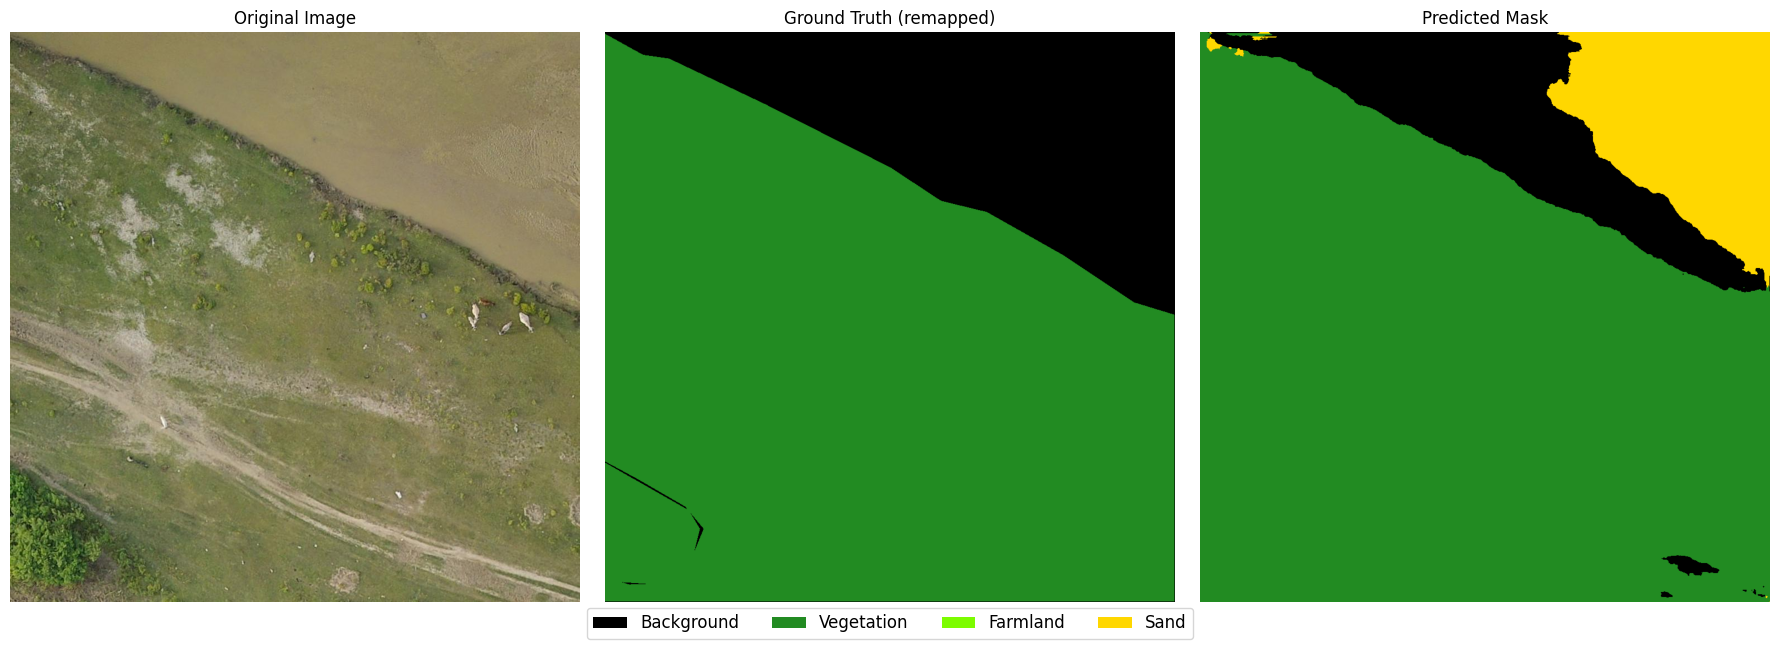

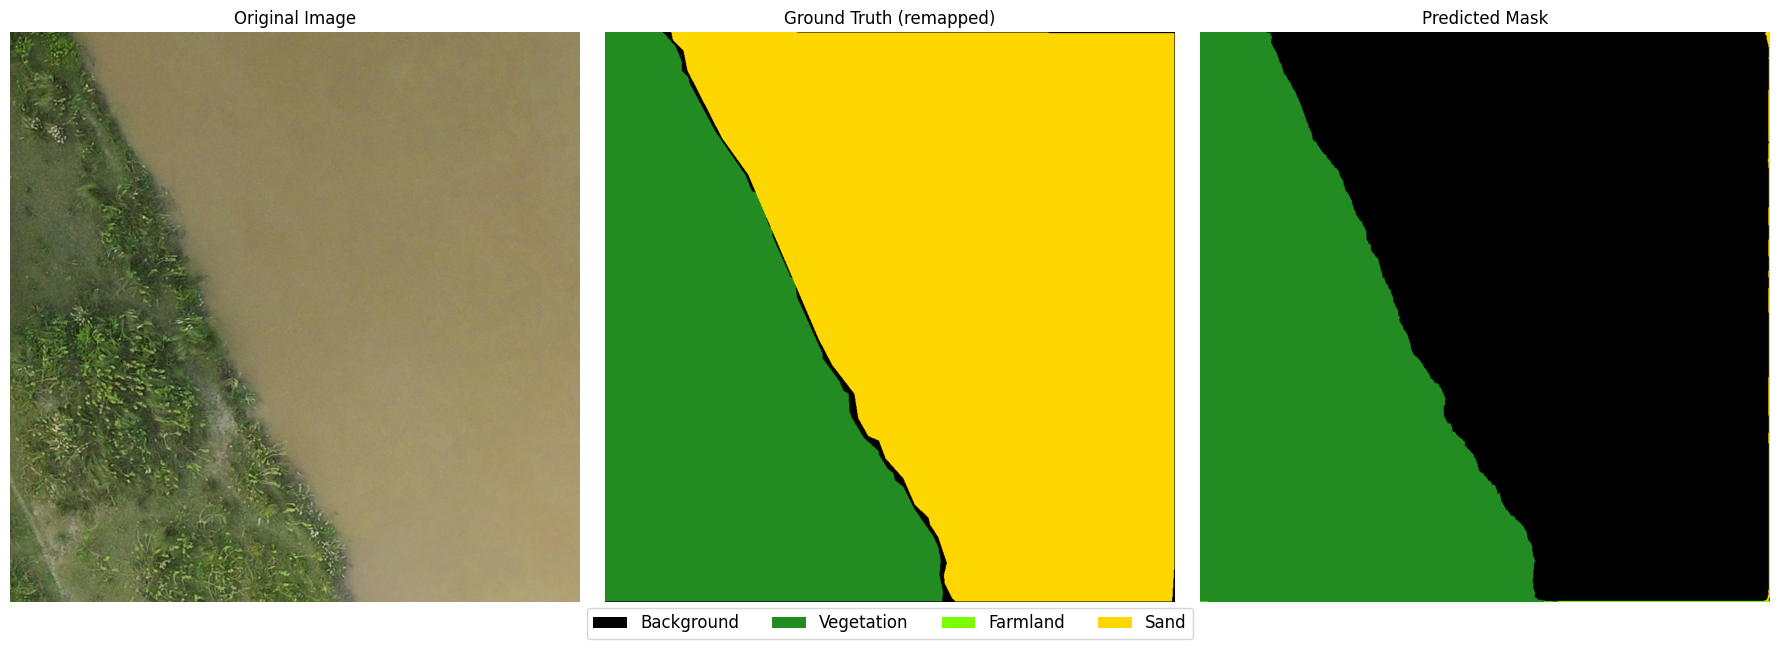

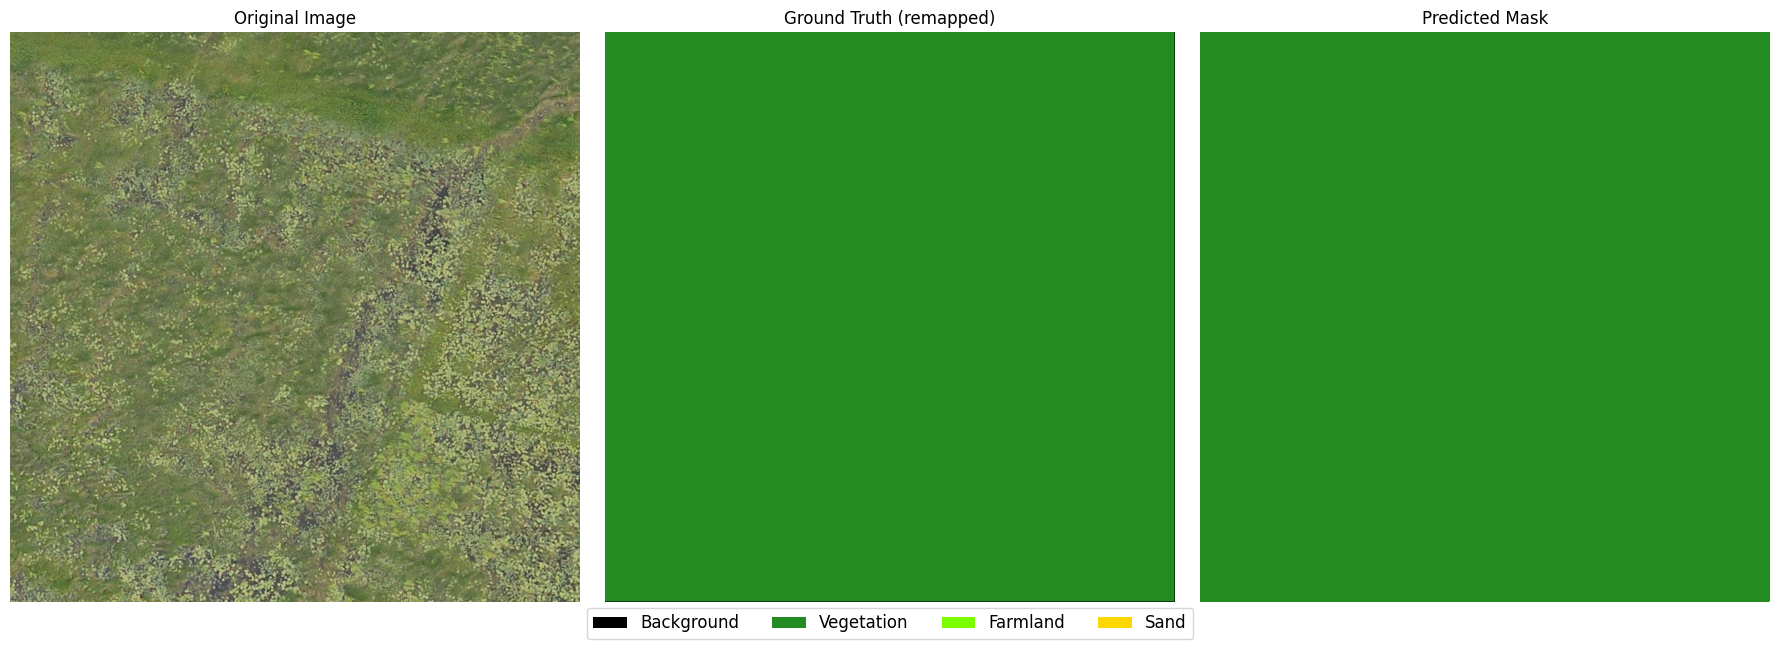

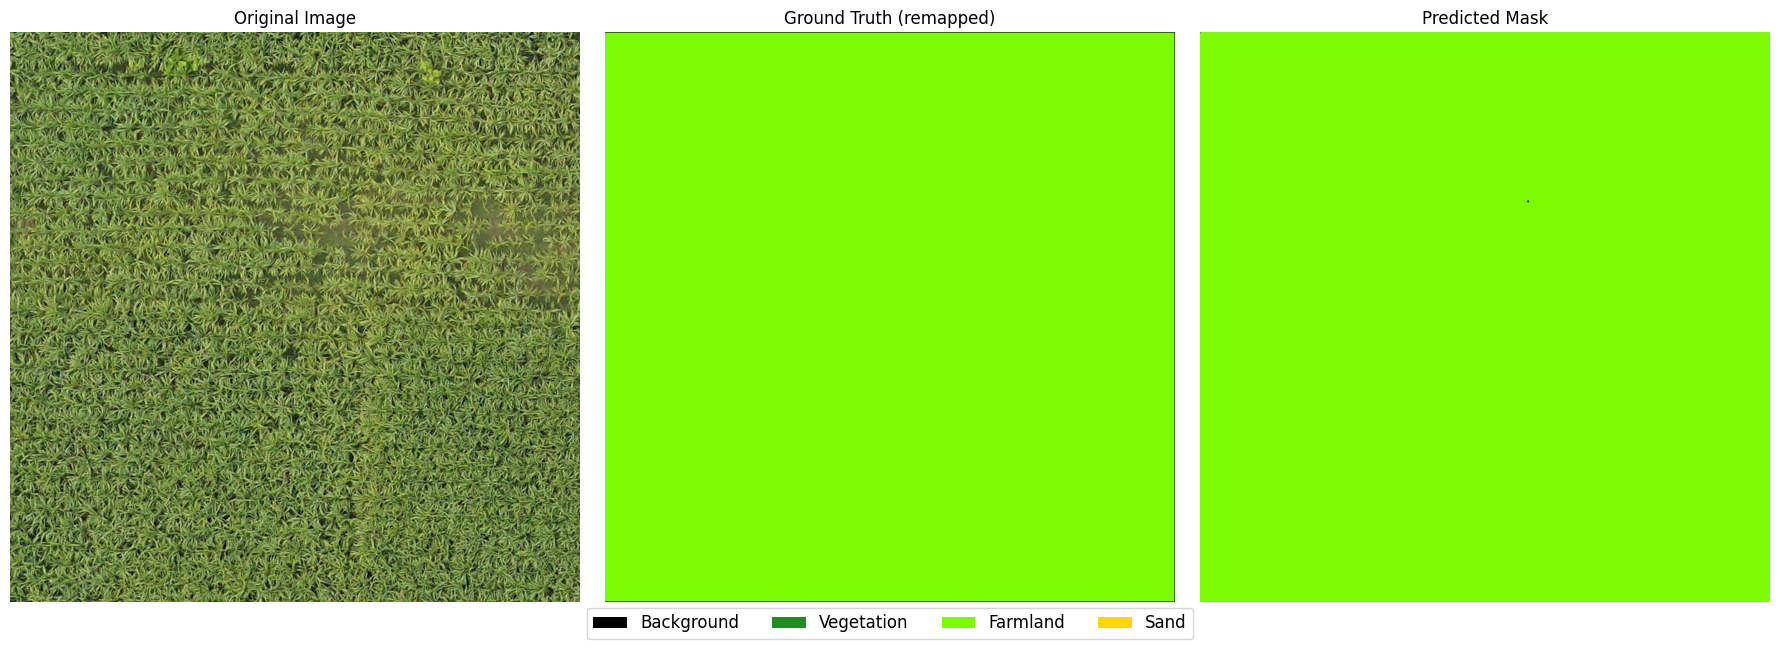

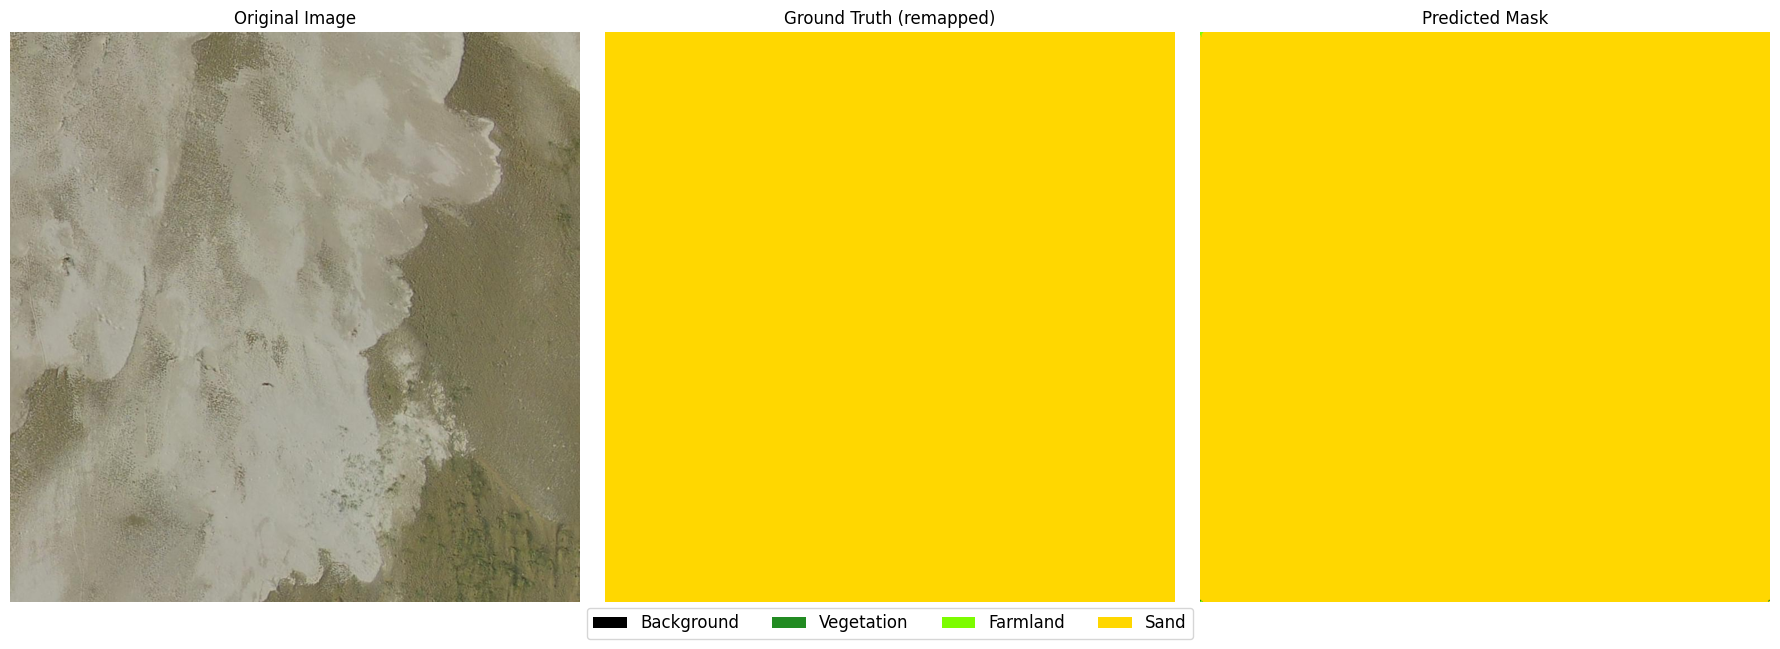

In [ ]:
import os
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import albumentations as A
from albumentations.pytorch import ToTensorV2
import segmentation_models_pytorch as smp
from matplotlib.patches import Patch

# ==========================================
# CONFIG
# ==========================================
CONFIG = {
    "TEST_IMG_DIR": "/content/AGRIFARM-13/test/images",
    "TEST_MASK_DIR": "/content/AGRIFARM-13/test/masks",

    "MODEL_PATH": "resnet34_unet_best_4classes.pth",

    "IMG_SIZE": 512,
    "NUM_CLASSES": 4,   # 0=Back, 1=Veg, 2=Farm, 3=Sand
    "DEVICE": "cuda" if torch.cuda.is_available() else "cpu",
    "NUM_SAMPLES": 5
}

# ==========================================
# COLORS + LABEL NAMES
# ==========================================
CLASS_COLORS = {
    0: [0, 0, 0],          # Background
    1: [34, 139, 34],      # Vegetation (merged)
    2: [124, 252, 0],      # Farmland
    3: [255, 215, 0],      # Sand
}

ID2LABEL = {
    0: "Background",
    1: "Vegetation",
    2: "Farmland",
    3: "Sand"
}

# ==========================================
# RESNET-34 UNET (same as training)
# ==========================================
def build_model(num_classes):
    model = smp.Unet(
        encoder_name="resnet34",
        encoder_weights=None,     # No pretrained weights for inference
        in_channels=3,
        classes=num_classes,
        activation=None
    )
    return model

# ==========================================
# REMAP TEST GT MASK
# (Must match training remapping!)
# ==========================================
def remap_gt_mask(mask):
    new_mask = np.zeros_like(mask)

    new_mask[(mask == 1) | (mask == 2) | (mask == 5)] = 1  # vegetation merged
    new_mask[mask == 3] = 2                                 # farmland
    new_mask[mask == 4] = 3                                 # sand

    # (mask==6) and others → ignored → treated as background
    return new_mask

# ==========================================
# COLORIZE MASK
# ==========================================
def colorize_mask(mask_2d):
    h, w = mask_2d.shape
    rgb = np.zeros((h, w, 3), dtype=np.uint8)
    for cls_id, color in CLASS_COLORS.items():
        rgb[mask_2d == cls_id] = color
    return rgb

# ==========================================
# PREDICTION FUNCTION
# ==========================================
def get_prediction(model, image_np, device):
    transform = A.Compose([
        A.Resize(CONFIG['IMG_SIZE'], CONFIG['IMG_SIZE']),
        A.Normalize(mean=(0.485, 0.456, 0.406),
                    std=(0.229, 0.224, 0.225)),
        ToTensorV2()
    ])

    augmented = transform(image=image_np)
    tensor_img = augmented["image"].unsqueeze(0).to(device)

    with torch.no_grad():
        logits = model(tensor_img)
        logits = F.interpolate(
            logits,
            size=image_np.shape[:2],
            mode="bilinear",
            align_corners=False
        )
        pred_mask = torch.argmax(logits, dim=1).squeeze().cpu().numpy()

    return pred_mask

# ==========================================
# MAIN INFERENCE LOOP
# ==========================================
def main():
    print("Loading ResNet-34 UNet model...")
    model = build_model(CONFIG["NUM_CLASSES"])

    if not os.path.exists(CONFIG["MODEL_PATH"]):
        print("Model file not found:", CONFIG["MODEL_PATH"])
        return

    model.load_state_dict(torch.load(CONFIG["MODEL_PATH"], map_location=CONFIG["DEVICE"]))
    model.to(CONFIG["DEVICE"])
    model.eval()
    print("✓ Model loaded successfully!")

    # collect test files
    files = sorted([f for f in os.listdir(CONFIG["TEST_IMG_DIR"]) if f.endswith(".jpg")])

    if len(files) == 0:
        print("No test images found!")
        return

    print(f"Found {len(files)} test images.")

    selected = random.sample(files, min(CONFIG["NUM_SAMPLES"], len(files)))

    for img_name in selected:
        img_path = os.path.join(CONFIG["TEST_IMG_DIR"], img_name)

        # mask name = image.jpg → image_mask.png
        mask_name = img_name.replace(".jpg", "_mask.png")
        mask_path = os.path.join(CONFIG["TEST_MASK_DIR"], mask_name)

        image_np = np.array(Image.open(img_path).convert("RGB"))

        if os.path.exists(mask_path):
            raw_mask = np.array(Image.open(mask_path).convert("L"))
            gt_mask = remap_gt_mask(raw_mask)   # FIXED SPELLING
            gt_color = colorize_mask(gt_mask)
        else:
            gt_mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
            gt_color = np.zeros_like(image)


        # prediction
        pred_mask = get_prediction(model, image_np, CONFIG["DEVICE"])
        pred_color = colorize_mask(pred_mask)

        # ============================
        # PLOT
        # ============================
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))

        axes[0].imshow(image_np)
        axes[0].set_title("Original Image")
        axes[0].axis("off")

        axes[1].imshow(gt_color)
        axes[1].set_title("Ground Truth (remapped)")
        axes[1].axis("off")

        axes[2].imshow(pred_color)
        axes[2].set_title("Predicted Mask")
        axes[2].axis("off")

        # legend
        legend_items = [Patch(facecolor=np.array(CLASS_COLORS[i]) / 255, label=ID2LABEL[i])
                        for i in CLASS_COLORS.keys()]

        fig.legend(handles=legend_items,
                   loc='lower center',
                   bbox_to_anchor=(0.5, -0.05),
                   ncol=4,
                   fontsize=12)

        plt.tight_layout()
        plt.savefig('resnet')
        plt.show()


if __name__ == "__main__":
    main()


Loading ResNet-34 UNet model...
✓ Model loaded!


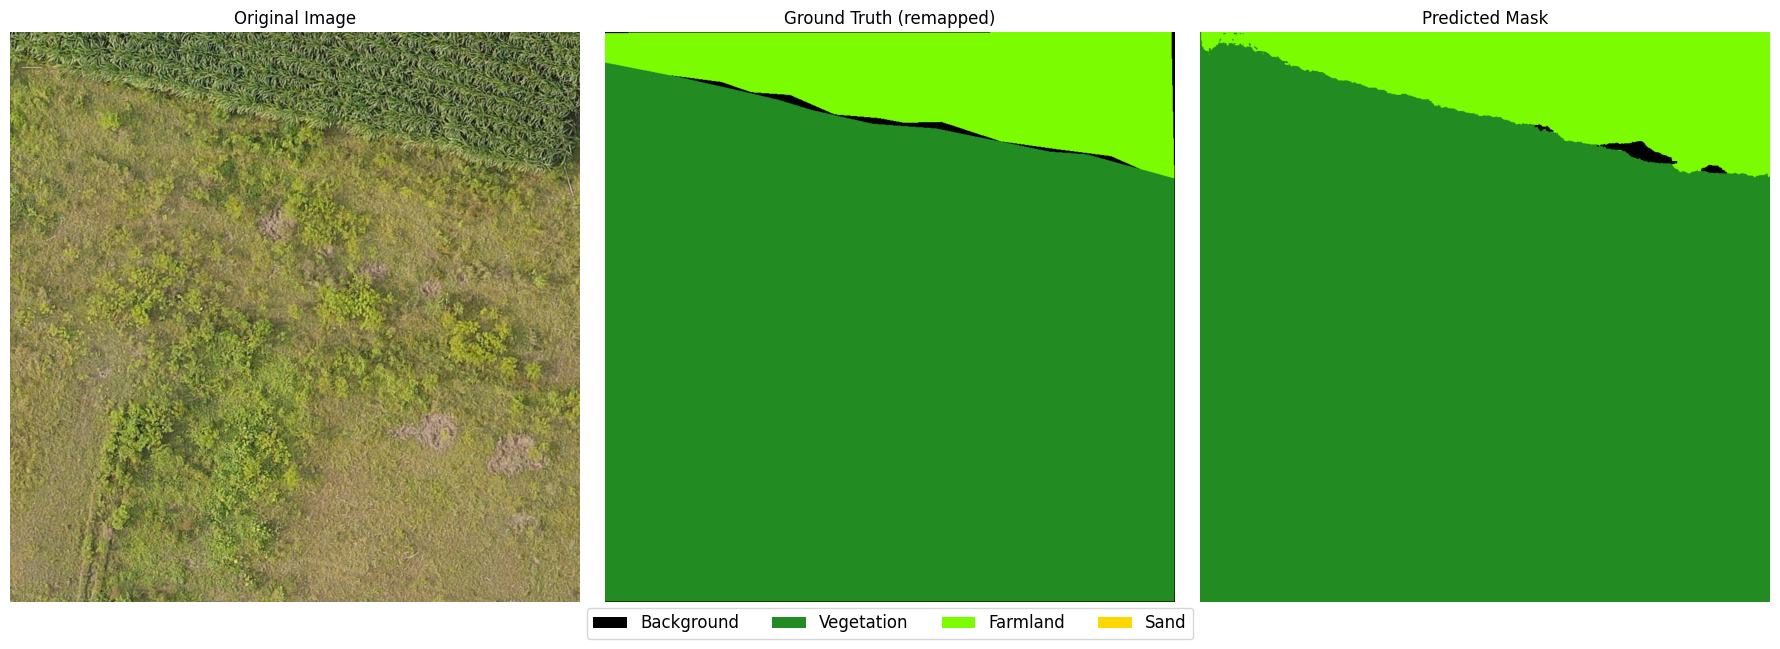

In [ ]:
import os
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import albumentations as A
from albumentations.pytorch import ToTensorV2
import segmentation_models_pytorch as smp
from matplotlib.patches import Patch

# ==========================================
# CONFIG
# ==========================================
CONFIG = {
    "MODEL_PATH": "resnet34_unet_best_4classes.pth",
    "IMG_SIZE": 512,
    "NUM_CLASSES": 4,
    "DEVICE": "cuda" if torch.cuda.is_available() else "cpu",
}

# ==========================================
# LABELS + COLORS
# ==========================================
CLASS_COLORS = {
    0: [0, 0, 0],          # Background
    1: [34, 139, 34],      # Vegetation
    2: [124, 252, 0],      # Farmland
    3: [255, 215, 0],      # Sand
}

ID2LABEL = {
    0: "Background",
    1: "Vegetation",
    2: "Farmland",
    3: "Sand"
}

# ==========================================
# MODEL
# ==========================================
def build_model(num_classes):
    return smp.Unet(
        encoder_name="resnet34",
        encoder_weights=None,
        in_channels=3,
        classes=num_classes,
        activation=None
    )

# ==========================================
# REMAP GT MASK (same as training)
# ==========================================
def remap_gt_mask(mask):
    new_mask = np.zeros_like(mask)
    new_mask[(mask == 1) | (mask == 2) | (mask == 5)] = 1  # vegetation merged
    new_mask[mask == 3] = 2                                # farmland
    new_mask[mask == 4] = 3                                # sand
    return new_mask

# ==========================================
# COLORIZE PRED / GT MASK
# ==========================================
def colorize_mask(mask_2d):
    h, w = mask_2d.shape
    rgb = np.zeros((h, w, 3), dtype=np.uint8)
    for cls_id, color in CLASS_COLORS.items():
        rgb[mask_2d == cls_id] = color
    return rgb

# ==========================================
# PREDICT SINGLE IMAGE
# ==========================================
def get_prediction(model, image_np):
    transform = A.Compose([
        A.Resize(CONFIG['IMG_SIZE'], CONFIG['IMG_SIZE']),
        A.Normalize(mean=(0.485, 0.456, 0.406),
                    std=(0.229, 0.224, 0.225)),
        ToTensorV2()
    ])

    augmented = transform(image=image_np)
    tensor_img = augmented["image"].unsqueeze(0).to(CONFIG["DEVICE"])

    with torch.no_grad():
        logits = model(tensor_img)

        logits = F.interpolate(
            logits,
            size=image_np.shape[:2],
            mode="bilinear",
            align_corners=False
        )

        pred_mask = torch.argmax(logits, dim=1).squeeze().cpu().numpy()

    return pred_mask

# ==========================================
# VISUALIZE SINGLE IMAGE
# ==========================================
def test_single(image_path, mask_path=None):
    print("Loading ResNet-34 UNet model...")

    model = build_model(CONFIG["NUM_CLASSES"])
    model.load_state_dict(torch.load(CONFIG["MODEL_PATH"], map_location=CONFIG["DEVICE"]))
    model.to(CONFIG["DEVICE"])
    model.eval()

    print("✓ Model loaded!")

    # load image
    image_np = np.array(Image.open(image_path).convert("RGB"))

    # load GT
    if mask_path and os.path.exists(mask_path):
        raw_mask = np.array(Image.open(mask_path).convert("L"))
        gt_mask = remap_gt_mask(raw_mask)
        gt_color = colorize_mask(gt_mask)
    else:
        gt_color = np.zeros_like(image_np)

    # prediction
    pred_mask = get_prediction(model, image_np)
    pred_color = colorize_mask(pred_mask)

    # display
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    axes[0].imshow(image_np)
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    axes[1].imshow(gt_color)
    axes[1].set_title("Ground Truth (remapped)")
    axes[1].axis("off")

    axes[2].imshow(pred_color)
    axes[2].set_title("Predicted Mask")
    axes[2].axis("off")

    # legend
    legend_items = [Patch(facecolor=np.array(CLASS_COLORS[i]) / 255, label=ID2LABEL[i])
                    for i in CLASS_COLORS.keys()]

    fig.legend(handles=legend_items,
               loc='lower center',
               bbox_to_anchor=(0.5, -0.05),
               ncol=4,
               fontsize=12)

    plt.tight_layout()
    plt.show()


# ==========================================
# RUN
# ==========================================
if __name__ == "__main__":
    test_single(
        image_path="/content/AGRIFARM-13/test/tile_45056_38912_png.rf.6766a5b661b4be8dabf5f4875591ad4a.jpg",
        mask_path="/content/AGRIFARM-13/test/tile_45056_38912_png.rf.6766a5b661b4be8dabf5f4875591ad4a_mask.png"
    )
